In [1]:
%matplotlib inline 
# import necessary libraries and specify that graphs should be plotted inline
import numpy as np
import pandas as pd
import sklearn
import mglearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Regression

### Linear Regression


w[0]: 0.393906  b: -0.031804


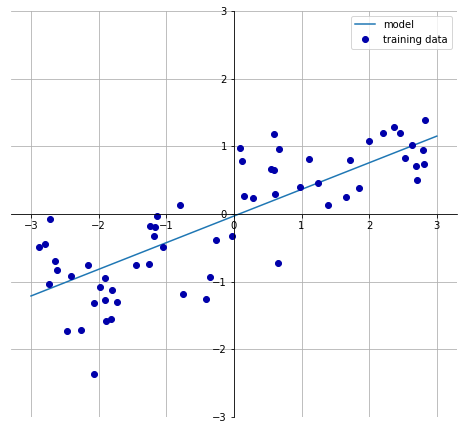

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)

# Devide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a linear regression model

lr = LinearRegression().fit(X_train, y_train)


# print the coefficients and model performance

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
Training set score: 0.67
Test set score: 0.66


In [4]:
X, y = mglearn.datasets.load_extended_boston()

# Devide the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

#print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))



lr.intercept_: 30.934563673642856
Training set score: 0.95
Test set score: 0.61


### Logistic Regression

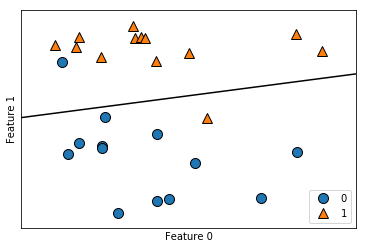

In [5]:
from sklearn.linear_model import LogisticRegression

X, y = mglearn.datasets.make_forge()

clf = LogisticRegression().fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(loc = 4)

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print("lr.coef_:", logreg.coef_)
print("lr.intercept_:", logreg.intercept_)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))





lr.coef_: [[ 1.90613069e+00  9.97890301e-02 -7.19389251e-02  9.12031439e-04
  -1.40951111e-01 -3.86590685e-01 -5.75034123e-01 -2.88431252e-01
  -2.30520072e-01 -3.53058155e-02 -1.73994173e-03  1.26447382e+00
   7.38500835e-02 -9.49597136e-02 -1.36488841e-02 -1.94012808e-02
  -5.35889090e-02 -3.38718491e-02 -4.14976624e-02  2.30453547e-03
   1.20270257e+00 -3.19643161e-01 -9.29150217e-02 -2.63436000e-02
  -2.51090638e-01 -1.24382224e+00 -1.58709639e+00 -5.89507446e-01
  -6.99229536e-01 -1.31174262e-01]]
lr.intercept_: [0.35088133]
Training set score: 0.953
Test set score: 0.958


## Gradient Descent

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import time
X, y = mglearn.datasets.make_wave(n_samples=60)
#X, y = mglearn.datasets.load_extended_boston()

# Devide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

eta = 0.05

n_iterations = 10000
m = 100

theta = np.random.randn(X_train.shape[1])

start_time = time.time()


for iteration in range(n_iterations):
    gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
    theta = theta - eta * gradients

print('SGD coefficients: ',theta)
print("--- Execution time of SGD: %s seconds ---" % (time.time() - start_time))



start_time = time.time()

lr = LinearRegression().fit(X_train, y_train)
print('LR coefficients: ',theta)
print("--- Execution time of LR: %s seconds ---" % (time.time() - start_time))



SGD coefficients:  [0.39670463]
--- Execution time of SGD: 0.06979632377624512 seconds ---
LR coefficients:  [0.39670463]
--- Execution time of LR: 0.0 seconds ---


In [8]:
from sklearn.linear_model import SGDRegressor


n_samples, n_features = 1000, 500
np.random.seed(0)

X = np.random.randn(n_samples, n_features)
theta = np.random.rand(n_features)
y = 3 + X.dot(theta) + np.random.randn(n_samples)


sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-5, eta0=0.01)

start_time = time.time()
sgd_reg.fit(X, y)


print("sgd.intercept_:", sgd_reg.intercept_)
#print("sgd.coef_:", sgd_reg.coef_)
print("--- Execution time: %s seconds ---" % (time.time() - start_time))

sgd.intercept_: [3.03805372]
--- Execution time: 0.11167192459106445 seconds ---


In [9]:
start_time = time.time()
lr = LinearRegression().fit(X, y)

#print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("--- Execution time: %s seconds ---" % (time.time() - start_time))

lr.intercept_: 3.033887309310786
--- Execution time: 0.18844985961914062 seconds ---
